In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # New import for Decision Tree

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("HRDataset_v14.csv")

In [7]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [9]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [10]:
# Rename the target column 'Termd' for clarity (1: Attrition, 0: Active)
# The Termd column (Terminated=1, Active=0) is our target variable for attrition.
df['Attrition'] = df['Termd']

In [11]:
df[['Employee_Name', 'Department', 'Salary', 'PerformanceScore', 'Attrition']].head()
 

,Employee_Name,Department,Salary,PerformanceScore,Attrition
0,"Adinolfi, Wilson K",Production,62506,Exceeds,0
1,"Ait Sidi, Karthikeyan",IT/IS,104437,Fully Meets,1
2,"Akinkuolie, Sarah",Production,64955,Fully Meets,1
3,"Alagbe,Trina",Production,64991,Fully Meets,0
4,"Anderson, Carol",Production,50825,Fully Meets,1


In [12]:
# --- 2. Exploratory Data Analysis (EDA) ---
overall_attrition_rate = df['Attrition'].mean()*100
print(f"\n--- Overall Attrition Rate: {overall_attrition_rate:.2f}% ---\n")


--- Overall Attrition Rate: 33.44% ---



In [13]:
# 2.2 Department-wise Attrition
print("Attrition by department")
dept_attrition = df.groupby("Department")["Attrition"].agg(['count', 'sum', 'mean']).reset_index()
dept_attrition.columns = ['Department', 'Total_Count', 'Attrition_Count', 'Attrition_Rate']
dept_attrition['Attrition_Rate'] *= 100
dept_attrition.sort_values(by='Attrition_Rate', ascending=False)

Attrition by department


,Department,Total_Count,Attrition_Count,Attrition_Rate
3,Production,209,83,39.712919
5,Software Engineering,11,4,36.363636
0,Admin Offices,9,2,22.222222
2,IT/IS,50,10,20.000000
4,Sales,31,5,16.129032
1,Executive Office,1,0,0.000000


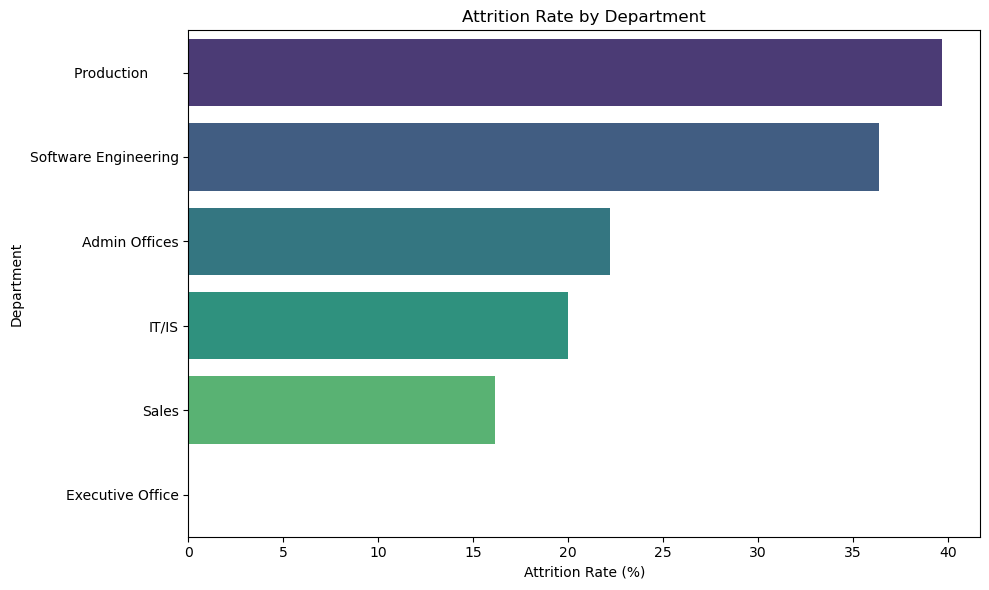

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition_Rate', y='Department', data=dept_attrition.sort_values(by='Attrition_Rate', ascending=False), palette='viridis')
plt.title('Attrition Rate by Department')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

In [15]:
# salary band analysis
print("Attrition by salary band")

#create the salary bins for better visulation
df['Salary_Band'] = pd.cut(df['Salary'], bins=[30000, 60000, 90000, 120000, np.inf],
                          labels=['Low', 'Mid_Low', 'Mid_High', 'High'], right=False)

Attrition by salary band


In [16]:
Salary_attrition = df.groupby("Salary_Band", observed=True)['Attrition'].mean().reset_index()
Salary_attrition['Attrition_Rate'] = Salary_attrition['Attrition'] * 100
Salary_attrition = Salary_attrition.sort_values(by='Attrition_Rate', ascending=False)

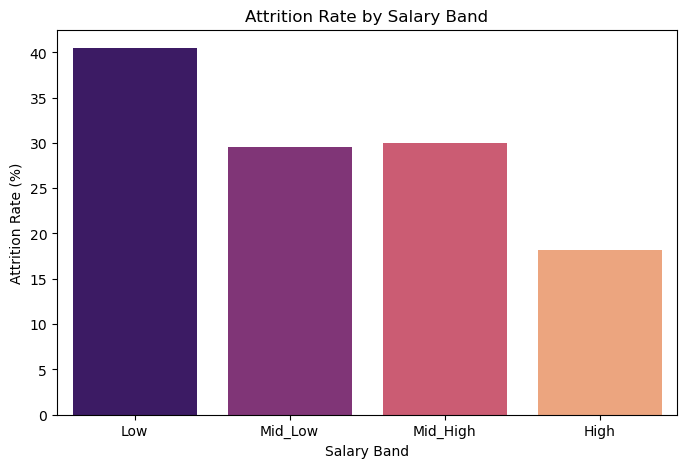

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="Salary_Band", y="Attrition_Rate", data=Salary_attrition, palette="magma")
plt.title("Attrition Rate by Salary Band")
plt.xlabel("Salary Band")
plt.ylabel("Attrition Rate (%)")
plt.show()

In [18]:
 # 2.4 Performance Score vs. Attrition
print(" Attrition by Performance Score ")
perf_attrition = df.groupby('PerformanceScore')['Attrition'].mean().reset_index()
perf_attrition['Attrition_Rate'] =perf_attrition["Attrition"] * 100
perf_attrition.sort_values(by='Attrition_Rate', ascending=False)

 Attrition by Performance Score 


,PerformanceScore,Attrition,Attrition_Rate
2,Needs Improvement,0.555556,55.555556
3,PIP,0.384615,38.461538
1,Fully Meets,0.333333,33.333333
0,Exceeds,0.216216,21.621622


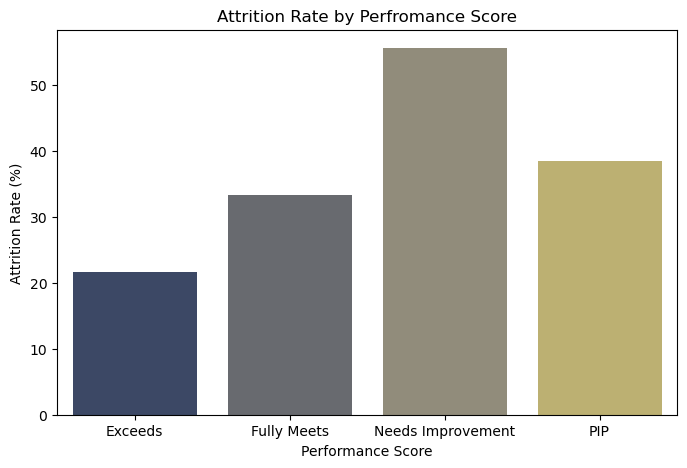

In [19]:
plt.figure(figsize = (8,5))
sns.barplot(x='PerformanceScore', y='Attrition_Rate', data=perf_attrition, palette = 'cividis')
plt.title('Attrition Rate by Perfromance Score')
plt.xlabel('Performance Score')
plt.ylabel('Attrition Rate (%)')
plt.show()

In [20]:
#  3. Feature Preprocessing and Selection for Modeling 

# Feature Selection
# Drop redundant/ID/date columns and the original 'Termd' column
features_to_drop = ['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
                    'EmpStatusID', 'DeptID', 'PositionID', 'Zip', 'DOB', 'Sex',
                    'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
                    'ManagerName', 'ManagerID', 'LastPerformanceReview_Date', 'Termd', 'Salary_Band']

In [21]:

df_model = df.drop(columns=features_to_drop, errors='ignore')

In [22]:
# 3.2 Handling Categorical Variables
# Select relevant categorical features for encoding
categorical_cols = ['MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
                    'RecruitmentSource', 'PerformanceScore', 'Department', 'Position', 'State']

In [23]:
# Use Label Encoding for PerformanceScore (as it is ordinal)
le = LabelEncoder()
df_model['PerformanceScore_Encoded'] = le.fit_transform(df_model['PerformanceScore'])
df_model = df_model.drop(columns=['PerformanceScore']) # Drop original


In [24]:
# One-Hot Encode other nominal categorical features
df_model = pd.get_dummies(df_model, columns=[col for col in categorical_cols if col != 'PerformanceScore'], drop_first=True)

In [25]:
# 3.3 Handling Missing Values (Simple Imputation)
# Fill missing 'EngagementSurvey' (numeric) with the mean
df_model['EngagementSurvey'].fillna(df_model['EngagementSurvey'].mean(), inplace=True)

In [26]:
# Check remaining NaNs
df_model.isnull().sum()

PerfScoreID               0
FromDiversityJobFairID    0
Salary                    0
EngagementSurvey          0
EmpSatisfaction           0
                         ..
State_TX                  0
State_UT                  0
State_VA                  0
State_VT                  0
State_WA                  0
Length: 95, dtype: int64

In [27]:
#  Model Building (Decision Tree Classifier) 

# Define X (features) and y (target)
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
X_train.shape[0]
X_test.shape[0]

94

In [30]:
# Initialize and Train Decision Tree Model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Make Predictions
y_pred = model_dt.predict(X_test)
y_prob = model_dt.predict_proba(X_test)[:, 1]

In [32]:
# Model Evaluation and Insights (Decision Tree)

print("Model Evaluation (Decision Tree Classifier)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation (Decision Tree Classifier)
Accuracy: 0.5426

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.68        63
           1       0.25      0.19      0.22        31

    accuracy                           0.54        94
   macro avg       0.45      0.45      0.45        94
weighted avg       0.51      0.54      0.53        94



In [33]:
# Interpreting the model using Feature Importance
print("\n--- Top Predictors of Attrition (Feature Importance) ---")
feature_importances = pd.Series(model_dt.feature_importances_, index=X.columns)
# Get top 10 most important features
top_predictors = feature_importances.sort_values(ascending=False).head(10)
print(top_predictors)


--- Top Predictors of Attrition (Feature Importance) ---
Absences                                0.162392
EngagementSurvey                        0.161474
Salary                                  0.095050
DaysLateLast30                          0.053583
MaritalDesc_Single                      0.049543
RecruitmentSource_LinkedIn              0.048819
RecruitmentSource_Google Search         0.046026
RecruitmentSource_Diversity Job Fair    0.043521
PerfScoreID                             0.034864
HispanicLatino_Yes                      0.033029
dtype: float64


In [34]:
# Features with higher importance values (closer to 1) are the strongest drivers in the decision-making process.

print("\n--- Key Insights from EDA and Model ---")
print(f"- Overall Attrition: {overall_attrition_rate:.2f}%")
print(f"- EDA suggests that the highest Attrition Rates are often found in: \n  - Departments like 'Production' or 'Software Engineering' (Check the department table above).\n  - Employees with 'Low' or 'Mid-Low' Salary Bands.\n  - Employees with the lowest Performance Scores ('Needs Improvement' or 'PIP').")
print("- The Decision Tree Feature Importance shows the statistical weight of each variable in predicting attrition, often highlighting key numeric factors like Salary, EngagementSurvey, and Age.")


--- Key Insights from EDA and Model ---
- Overall Attrition: 33.44%
- EDA suggests that the highest Attrition Rates are often found in: 
  - Departments like 'Production' or 'Software Engineering' (Check the department table above).
  - Employees with 'Low' or 'Mid-Low' Salary Bands.
  - Employees with the lowest Performance Scores ('Needs Improvement' or 'PIP').
- The Decision Tree Feature Importance shows the statistical weight of each variable in predicting attrition, often highlighting key numeric factors like Salary, EngagementSurvey, and Age.


In [35]:
# Accuracy should be 70 to 85 %

In [36]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# --- 1. Instantiate the selector (select the top 10 features) ---
# Note: For this to work, X_train data should be scaled/normalized if using numerical features.
# If your features are all categorical (one-hot encoded), chi2 might be better, but f_classif is a good general choice.
k = 10
selector = SelectKBest(score_func=f_classif, k=k)

# --- 2. Fit and transform the training data ---
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# --- 3. Get the names of the selected columns (Optional, for inspection) ---
selected_features = X_train.columns[selector.get_support()]

print(f"Original number of features: {X_train.shape[1]}")
print(f"Selected number of features: {X_train_selected.shape[1]}")
print(f"Top {k} selected features: {list(selected_features)}")

# Now, train your model using X_train_selected and X_test_selected
# dtree.fit(X_train_selected, y_train)

Original number of features: 94
Selected number of features: 10
Top 10 selected features: ['PerfScoreID', 'FromDiversityJobFairID', 'DaysLateLast30', 'PerformanceScore_Encoded', 'MaritalDesc_Married', 'MaritalDesc_Separated', 'MaritalDesc_Single', 'RecruitmentSource_Diversity Job Fair', 'RecruitmentSource_Google Search', 'RecruitmentSource_LinkedIn']


In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# --- 1. Check the original class distribution ---
print("Original dataset shape %s" % Counter(y_train))

# --- 2. Instantiate and apply SMOTE ---
# random_state ensures reproducibility
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- 3. Check the new class distribution ---
print("Resampled dataset shape %s" % Counter(y_train_smote))

# Now, train your model using the SMOTE-balanced data
# dtree.fit(X_train_smote, y_train_smote)

Original dataset shape Counter({0: 144, 1: 73})
Resampled dataset shape Counter({1: 144, 0: 144})


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.

In [38]:
from sklearn.tree import DecisionTreeClassifier

# --- 1. Instantiate the model with class_weight='balanced' ---
# The model will automatically calculate weights inversely proportional to class frequencies.
dtree_weighted = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

# --- 2. Train the model on the original data split (no need for SMOTE data) ---
dtree_weighted.fit(X_train, y_train)

# --- 3. Make predictions and evaluate ---
# y_pred_weighted = dtree_weighted.predict(X_test)
# print(accuracy_score(y_test, y_pred_weighted))
# print(classification_report(y_test, y_pred_weighted))

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# --- 1. Define the parameters grid to search ---
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],  # Max depth of the tree
    'min_samples_leaf': [1, 5, 10, 20],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']     # Function to measure the quality of a split
}

# --- 2. Instantiate the Decision Tree Classifier ---
dtree = DecisionTreeClassifier(random_state=42)

# --- 3. Instantiate GridSearchCV ---
# 'scoring'='recall' is often better than 'accuracy' for imbalanced data (Attrition prediction)
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    scoring='recall', # Focus on improving the recall of the minority class
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,       # Use all available cores
    verbose=1
)

# --- 4. Fit the grid search to the training data ---
grid_search.fit(X_train, y_train)

# --- 5. Get the best parameters and best score ---
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_dtree = grid_search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (Recall): {best_score:.4f}")

# --- 6. Evaluate the best model on the test set ---
# y_pred_tuned = best_dtree.predict(X_test)
# print(accuracy_score(y_test, y_pred_tuned))
# print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1}
Best cross-validation score (Recall): 0.4924


In [40]:
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Evaluate the tuned model on the unseen test data ---
y_pred_tuned = best_dtree.predict(X_test)

# --- 2. Print performance metrics ---
print("--- Evaluation of Hyperparameter-Tuned Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

# You should see improved recall and accuracy here compared to 0.5426

--- Evaluation of Hyperparameter-Tuned Decision Tree ---
Accuracy: 0.6383

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.75        63
           1       0.43      0.32      0.37        31

    accuracy                           0.64        94
   macro avg       0.57      0.56      0.56        94
weighted avg       0.62      0.64      0.62        94



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# --- 1. Define the parameters grid for Random Forest ---
rf_param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [5, 10, 15, None],             # Max depth of the trees
    'min_samples_leaf': [1, 5],                 # Minimum number of samples at a leaf
    'class_weight': ['balanced', None]          # Important for imbalance
}

# --- 2. Instantiate the Random Forest Classifier ---
rf_model = RandomForestClassifier(random_state=42)

# --- 3. Instantiate GridSearchCV ---
# We'll continue to prioritize 'recall' for the minority class (Attrition)
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# --- 4. Fit the grid search to the training data (use SMOTE data if you chose that method, otherwise use X_train) ---
rf_grid_search.fit(X_train, y_train)

# --- 5. Get the best Random Forest model ---
best_rf_model = rf_grid_search.best_estimator_

print("\n--- Best Random Forest Parameters and Score ---")
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation score (Recall): {rf_grid_search.best_score_:.4f}")

# --- 6. Evaluate the best Random Forest model on the test set ---
y_pred_rf = best_rf_model.predict(X_test)
print("\n--- Evaluation of Best Random Forest Model ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 48 candidates, totalling 240 fits

--- Best Random Forest Parameters and Score ---
Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 300}
Best cross-validation score (Recall): 0.5229

--- Evaluation of Best Random Forest Model ---
Accuracy: 0.6809

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        63
           1       0.51      0.68      0.58        31

    accuracy                           0.68        94
   macro avg       0.66      0.68      0.66        94
weighted avg       0.71      0.68      0.69        94

